In [1]:
##Importing the required Libraries
import numpy as np
import h5py
import matplotlib.pyplot as plt
from testCases_v4a import *
from dnn_utils_v2 import sigmoid,sigmoid_backward,relu,relu_backward

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2
np.random.seed(1)

## Initialization

#### 2 Layer NN

In [3]:
###Initialization of parameters with random values
def initialize_parameters(n_x,n_h,n_y):
    
    
    """
    Arguements:
     n_x -> size of the input layer
     n_h -> size of the hidden layer
     n_y -> size of the output layer
    
    """
    
    """
    Return: Parameters
        W1 -> (nh,nx)
        b1 -> (nh_1)
        W2 -> (ny,nh)
        b2 -> (ny,1)
        
    
    """
    
    np.random.seed(1)
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    assert(W1.shape == (n_h,n_x))
    assert(b1.shape == (n_h,1))
    assert(W2.shape == (n_y,n_h))
    assert(b2.shape == (n_y,1))
    
    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    return parameters
    
    
    

In [4]:
##Sanity Check for parameter initialization
parameters = initialize_parameters(3,2,1)
print("W1 = "+str(parameters["W1"]))
print("b1 = "+str(parameters["b1"]))
print("W2 = "+str(parameters["W2"]))
print("b2 = "+str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


### L layer NN

In [5]:
##Initialization for L layer model
## Number of layers is len(layer_dims) and using HE initialization to avoid platous problem
def initialize_parameters_deep(layer_dims):
    
    """"
    layer_dims ->  Python array (list) containing the dimension of each layer
    
    Returns :
    Parameters -> python dictionary containing the parameters of each layer (W1,b1,W2,b2.....)
    
    """
    
    parameters = {}
    
    L = len(layer_dims)
    
    for l in range(1,L):
        parameters["W"+str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])* np.sqrt(2/layer_dims[l-1])
        parameters["b"+str(l)] = np.zeros((layer_dims[l],1))
        assert(parameters["W"+str(l)].shape == (layer_dims[l],layer_dims[l-1]))
        assert(parameters["b"+str(l)].shape == (layer_dims[l],1))
    
    return parameters
    
    

In [6]:
# Sanity check of L layer Initialization
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.20177804 -0.15771567  0.92471825 -1.30294739 -0.20391454]
 [-0.2428973   0.71705876 -0.69563232 -0.10905317 -0.55520641]
 [ 0.02669832  0.36860471 -0.69609269  0.72398684  0.57021604]
 [ 0.31780532  0.56975133 -0.43242747 -0.0777226  -0.59183256]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.18942548  0.37501795 -0.48907801 -0.28054711]
 [-0.48590448 -0.59765064 -0.47464269 -0.00895522]
 [-0.79005772  0.16575693  1.17365737  0.52470446]]
b2 = [[0.]
 [0.]
 [0.]]


## 4.Forward Propagation of the module

#### 4.1 Linear Forward

In [7]:
def linear_forward(A,W,b):
    """
    Implement the the linear forward function of the DeepNN
    Arguements:
        A -> Activation from previous layer
        W -> Weights of the current layer size of (Current layer,Previous Layer)
        b -> bias vector numpy array of size (current layer,1)
    
    Returns:
        Z -> The input of the activation function, also called pre activation parameter
        cache -> A python tuple containing A,W and b used for backward propagation
    """
    
    Z = np.dot(W,A) + b
    
    cache = (A,W,b)
    
    assert(Z.shape == (W.shape[0],A.shape[1]))
    return Z,cache

In [8]:
A, W, b = linear_forward_test_case()
print(A.shape)
print(W.shape)
Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))
print(linear_cache)

(3, 2)
(1, 3)
Z = [[ 3.26295337 -1.23429987]]
(array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ]]), array([[ 1.74481176, -0.7612069 ,  0.3190391 ]]), array([[-0.24937038]]))


#### 4.2 Linear Activation forward

In [9]:
def linear_activation_forward(A_prev,W,b,activation):
    
    if activation == "sigmoid":
        
        Z,linear_cache = linear_forward(A_prev,W,b)
        A,activation_cache = sigmoid(Z)
    elif activation == "relu":
        Z,linear_cache = linear_forward(A_prev,W,b)
        A,activation_cache = relu(Z)
    
    assert(A.shape == (W.shape[0],A_prev.shape[1]))
    
    cache = (linear_cache,activation_cache)
    
    return A,cache
        
        

In [10]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


## L layer model

In [11]:
def L_model_forward(X,parameters):
    
    caches = []
    A = X
    L = len(parameters)//2
    
    for l in range(1,L):
        A_prev = A
        #print(l)
       # print(A_prev.shape)
        #print(parameters["W"+str(l)].shape)
        A,activation_cache = linear_activation_forward(A_prev,parameters["W"+str(l)],parameters["b"+str(l)],"relu")
        caches.append(activation_cache)
    
    AL,activation_cache = linear_activation_forward(A,parameters["W"+str(L)],parameters["b"+str(L)],"sigmoid")
    caches.append(activation_cache)
    
    assert(AL.shape == ((1,X.shape[1])))
    
    return AL,caches
    

In [12]:
X, parameters = L_model_forward_test_case_2hidden()
print(parameters)
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

{'W1': array([[ 0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384],
       [-1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953],
       [-0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143],
       [-0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059]]), 'b1': array([[ 1.38503523],
       [-0.51962709],
       [-0.78015214],
       [ 0.95560959]]), 'W2': array([[-0.12673638, -1.36861282,  1.21848065, -0.85750144],
       [-0.56147088, -1.0335199 ,  0.35877096,  1.07368134],
       [-0.37550472,  0.39636757, -0.47144628,  2.33660781]]), 'b2': array([[ 1.50278553],
       [-0.59545972],
       [ 0.52834106]]), 'W3': array([[ 0.9398248 ,  0.42628539, -0.75815703]]), 'b3': array([[-0.16236698]])}
AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


## 5.Cost function

In [13]:
def compute_cost(AL,Y):
    
    m = Y.shape[1]
    
    cost = -(np.dot(Y,np.log(AL.T)) + np.dot(1-Y,np.log(1-AL.T)))/m
    
    cost = np.squeeze(cost)
    
    assert(cost.shape==())
    
    return cost

In [14]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.2797765635793423


## 6.Back Propagation of the Model 

In [15]:
def linear_backward(dZ,cache):
    
    A_prev,W,b = cache
    m = A_prev.shape[1]
    
    dW = np.dot(dZ,A_prev.T)/m
    db = np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)
    
    assert(dA_prev.shape == A_prev.shape)
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)
    
    return dA_prev,dW,db

In [16]:
# Set up some test inputs
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW = [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db = [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]


In [17]:
def linear_activation_backward(dA,cache,activation):
    
    linear_cache,activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev,dW,db = linear_backward(dZ,linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev,dW,db = linear_backward(dZ,linear_cache)
    
    return dA_prev,dW,db

In [18]:
dAL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


#### L-Model Backward

In [19]:
def L_model_backward(AL,Y,caches):
    
    grads = {}
    L = len(caches)
    m =  AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = - (np.divide(Y,AL) - np.divide(1-Y,1-AL))
    current_cache = caches[L-1]
    
    grads["dA"+str(L-1)],grads["dW"+str(L)],grads["db"+str(L)] = linear_activation_backward(dAL,current_cache,"sigmoid")
    #print("Length L:",L)
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_tmp,dW_tmp,db_tmp = linear_activation_backward(grads["dA"+str(l+1)],current_cache,"relu")
        grads["dA"+str(l)] = dA_tmp
        grads["dW"+str(l+1)] = dW_tmp
        grads["db"+str(l+1)] = db_tmp
    
    return grads
    

In [20]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print_grads(grads)

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


#### Update parameters

In [30]:
def update_parameters(parameters,grads,learning_rate):
    
    L = len(parameters)//2
    
    for l in range(L):
        parameters["W"+str(l+1)] = parameters["W"+str(l+1)] - learning_rate*grads["dW"+str(l+1)]
        parameters["b"+str(l+1)] = parameters["b"+str(l+1)] - learning_rate * grads["db"+str(l+1)]
    
    return parameters

In [31]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


# Implementing complete NN model Application

In [21]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [23]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

y = 0. It's a non-cat picture.


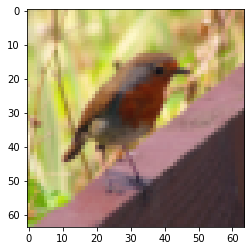

In [24]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [67]:
train_x_orig.shape

(209, 64, 64, 3)

In [68]:
test_x_orig.shape

(50, 64, 64, 3)

In [25]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [26]:
###reshaping the training and testing examples
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0],-1).T

##Standarddizing the inputs
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


###  2 Layer NN

In [27]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [32]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    
    costs = []
    grads ={}
    
    m = X.shape[1]
    (n_x,n_h,n_y) = layers_dims
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(num_iterations):
        
        A1,cache1 = linear_activation_forward(X,W1,b1,"relu")
        A2,cache2 = linear_activation_forward(A1,W2,b2,"sigmoid")
        
        cost = compute_cost(A2,Y)
        dA2 = -(np.divide(Y,A2)-np.divide(1-Y,1-A2))
        
        dA1,dW2,db2 = linear_activation_backward(dA2,cache2,"sigmoid")
        dA0,dW1,db1 = linear_activation_backward(dA1,cache1,"relu")
        
        grads["dW1"] = dW1
        grads["db1"] = db1
        grads["dW2"] = dW2
        grads["db2"] = db2
        
        parameters = update_parameters(parameters,grads,learning_rate)
        
        W1 = parameters["W1"]
        W2 = parameters["W2"]
        b1 = parameters["b1"]
        b2 = parameters["b2"]
        
        if print_cost and i%100 ==0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i%100 ==0:
            costs.append(cost)
    
    #Plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters
        

Cost after iteration 0: 0.6930497356599888
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.515830477276473
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.4339163151225749
Cost after iteration 800: 0.40079775362038883
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.33942815383664127
Cost after iteration 1100: 0.30527536361962654
Cost after iteration 1200: 0.2749137728213016
Cost after iteration 1300: 0.24681768210614843
Cost after iteration 1400: 0.19850735037466116
Cost after iteration 1500: 0.1744831811255662
Cost after iteration 1600: 0.17080762978096575
Cost after iteration 1700: 0.11306524562164726
Cost after iteration 1800: 0.09629426845937152
Cost after iteration 1900: 0.08342617959726863
Cost after iteration 2000: 0.07439078704319081
Cost after iteration 2100: 0.06630748

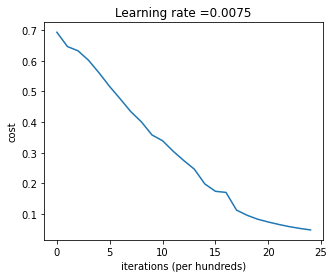

In [33]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [34]:
def predict(train_x,train_y,parameters):
    AL,cache = L_model_forward(train_x,parameters)
    AL = (AL>=0.5).astype(int)
    print("Accuracy is :",np.mean(train_y==AL))
    return AL

In [35]:
Y_train_pred = predict(train_x,train_y,parameters)

Accuracy is : 1.0


In [36]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy is : 0.72


### L Layer model

In [37]:
### CONSTANTS ###
layers_dims = [12288, 20, 7,5,  1] #  4-layer model

In [41]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    
    np.random.seed(3)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    #print(parameters)
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X,parameters)
       
        #print(AL.shape)
        #print(Y.shape)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
       # print(-(np.dot(Y,np.log(AL.T)) + np.dot(1-Y,np.log(1-AL.T)))/m)
        cost = compute_cost(AL,Y)
        #print(cost)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL,Y,caches)
        
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters,grads,learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.811602
Cost after iteration 100: 0.667670
Cost after iteration 200: 0.633982
Cost after iteration 300: 0.605747
Cost after iteration 400: 0.562971
Cost after iteration 500: 0.415941
Cost after iteration 600: 0.320471
Cost after iteration 700: 0.232473
Cost after iteration 800: 0.148476
Cost after iteration 900: 0.087503
Cost after iteration 1000: 0.057388
Cost after iteration 1100: 0.039937
Cost after iteration 1200: 0.030271
Cost after iteration 1300: 0.024070
Cost after iteration 1400: 0.019657
Cost after iteration 1500: 0.016492
Cost after iteration 1600: 0.014169
Cost after iteration 1700: 0.012192
Cost after iteration 1800: 0.010697
Cost after iteration 1900: 0.009464
Cost after iteration 2000: 0.008488
Cost after iteration 2100: 0.007662
Cost after iteration 2200: 0.006931
Cost after iteration 2300: 0.006335
Cost after iteration 2400: 0.005813


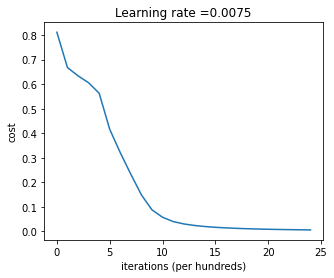

In [45]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [46]:
Y_train_pred = predict(train_x,train_y,parameters)

Accuracy is : 1.0


In [47]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy is : 0.8
